In [1]:
#importing our required libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
import gensim
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
# nltk.download('stopwords')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelBinarizer

C:\Users\prem\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df=pd.read_csv('data.csv')
df.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [3]:
df.shape

(1567, 592)

(rows,columns)

In [4]:
df.isnull().values.any()

True

#####  Whoa! we've got NaN values in our dataset which makes of no use

Solution??

----->>>>>Simple!!!!! just transform NaN values @mean of that particular values

In [5]:
df=df.fillna(df.mean())

##### we've did something that replaces NaN with mean of that features ! okay, just cross check to ensure

In [6]:
df.isnull().values.any()

False

##### Hmm.. we've got False....which means there is nooooo NaN values in our dataset ;)

#### And Now , the funny thing is every feature has different range of values... a basic strategy of handling this values is....NORMALIZATION of each and every feature down to a single scale.Here, I'm just removing first and last columns of our dataset(date and label) and  normalizing values(I'll add those columns later :)

In [7]:
df2=df[['Time','Pass/Fail']]
df=df.drop(['Time', 'Pass/Fail'],axis=1)
# df.head(3)
df2.head()

,Time,Pass/Fail
0,2008-07-19 11:55:00,-1
1,2008-07-19 12:32:00,-1
2,2008-07-19 13:17:00,1
3,2008-07-19 14:43:00,-1
4,2008-07-19 15:22:00,-1


In [8]:
norm_df=(df-df.mean())
norm_df.head(3)
#sc=StandardScaler()


,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,16.477104,68.149769,-12.814018,14.749873,-2.836813,0.0,-3.499608,0.002378,0.037638,0.017041,...,-1.058181e-16,-2.387424e-12,0.000404,-0.003518,-0.000347,-0.704826,0.000000,3.469447e-18,8.673617e-19,-1.421085e-14
1,81.327104,-30.710231,29.874882,67.283973,-3.367613,0.0,1.230392,0.002878,0.033738,0.000341,...,6.040453e-04,1.102701e+02,0.001804,0.006982,0.001653,1.376874,-0.011858,3.625096e-03,7.166667e-04,1.085344e+02
2,-81.842896,64.089769,-14.136218,301.640573,-2.686813,0.0,-5.625108,0.002278,-0.019262,0.004941,...,9.404045e-03,-1.507417e+01,-0.004296,0.000382,0.000053,0.106674,0.036942,3.192510e-02,9.516667e-03,-1.680987e+01


In [9]:
norm_df.isnull().values.any()

False

In [10]:
norm_df=norm_df.fillna(0)
norm_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,16.477104,68.149769,-12.814018,14.749873,-2.836813,0.0,-3.499608,0.002378,0.037638,0.017041,...,-1.058181e-16,-2.387424e-12,0.000404,-0.003518,-0.000347,-0.704826,0.000000,3.469447e-18,8.673617e-19,-1.421085e-14
1,81.327104,-30.710231,29.874882,67.283973,-3.367613,0.0,1.230392,0.002878,0.033738,0.000341,...,6.040453e-04,1.102701e+02,0.001804,0.006982,0.001653,1.376874,-0.011858,3.625096e-03,7.166667e-04,1.085344e+02
2,-81.842896,64.089769,-14.136218,301.640573,-2.686813,0.0,-5.625108,0.002278,-0.019262,0.004941,...,9.404045e-03,-1.507417e+01,-0.004296,0.000382,0.000053,0.106674,0.036942,3.192510e-02,9.516667e-03,-1.680987e+01


for all NaN values in a column , we've made values as 0(5th feature in above).we can apply other imputation methods if model dosent works well in this case. 

In [11]:
part_data= pd.concat([df2['Time'],norm_df,df2['Pass/Fail']], axis=1, sort=False)
part_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,16.477104,68.149769,-12.814018,14.749873,-2.836813,0.0,-3.499608,0.002378,0.037638,...,-2.387424e-12,0.000404,-0.003518,-0.000347,-0.704826,0.000000,3.469447e-18,8.673617e-19,-1.421085e-14,-1
1,2008-07-19 12:32:00,81.327104,-30.710231,29.874882,67.283973,-3.367613,0.0,1.230392,0.002878,0.033738,...,1.102701e+02,0.001804,0.006982,0.001653,1.376874,-0.011858,3.625096e-03,7.166667e-04,1.085344e+02,-1
2,2008-07-19 13:17:00,-81.842896,64.089769,-14.136218,301.640573,-2.686813,0.0,-5.625108,0.002278,-0.019262,...,-1.507417e+01,-0.004296,0.000382,0.000053,0.106674,0.036942,3.192510e-02,9.516667e-03,-1.680987e+01,1
3,2008-07-19 14:43:00,-25.732896,-15.950231,-1.514018,-486.584027,-2.876613,0.0,3.123792,-0.000122,0.025338,...,-2.409117e+01,-0.001096,-0.005018,-0.001347,-1.013426,-0.001258,-1.574904e-03,-8.833333e-04,-2.582687e+01,-1
4,2008-07-19 15:22:00,17.787104,7.019769,32.819382,-69.856627,-2.663613,0.0,-0.716208,0.001678,0.040238,...,-2.387424e-12,-0.020096,0.461282,0.100653,96.235374,-0.001258,-1.574904e-03,-8.833333e-04,-2.582687e+01,-1


##### we've done with normalization and...now, we've to find covariance (variability of one feature w.r.t another feature). To do this , we are finding co-variance matrix for each feature wrt another

In [12]:
norm_cov=norm_df.cov()
norm_cov.shape

(590, 590)

##### we've to keep in mind that A positive covariance means the variables are positively related, while a negative covariance means the variables are inversely related.The aim of creating a covariant matrix is to show how large the changes in data of the dataset. If two data sets are equal to each other then the covariance will be equal to 1.

In [13]:
from scipy.linalg import eig as LA
values, vectors = LA(norm_cov)
print(values)
print(vectors)


[ 5.34151979e+07+0.j  2.17466719e+07+0.j  8.24837662e+06+0.j
  2.07388086e+06+0.j  1.31540439e+06+0.j  4.67693557e+05+0.j
  2.90863555e+05+0.j  2.83668601e+05+0.j  2.37155830e+05+0.j
  2.08513836e+05+0.j  1.96098849e+05+0.j  1.86856549e+05+0.j
  1.52422354e+05+0.j  1.13215032e+05+0.j  1.08493848e+05+0.j
  1.02849533e+05+0.j  1.00166164e+05+0.j  8.33473762e+04+0.j
  8.15850591e+04+0.j  7.76560524e+04+0.j  6.66060410e+04+0.j
  6.52620058e+04+0.j  5.96776503e+04+0.j  5.16269933e+04+0.j
  5.03324580e+04+0.j  4.54661746e+04+0.j  4.41914029e+04+0.j
  4.15532551e+04+0.j  3.55294040e+04+0.j  3.31436743e+04+0.j
  2.67385181e+04+0.j  1.47123429e+04+0.j  1.44089194e+04+0.j
  1.09321187e+04+0.j  1.04841308e+04+0.j  9.48876548e+03+0.j
  8.34665462e+03+0.j  7.22765535e+03+0.j  5.34196392e+03+0.j
  4.95614671e+03+0.j  4.23060022e+03+0.j  4.10673182e+03+0.j
  3.41199406e+03+0.j  3.24193522e+03+0.j  2.74523635e+03+0.j
  2.35027999e+03+0.j  2.16835314e+03+0.j  1.86414157e+03+0.j
  1.76741826e+03+0.j  1.

##### here, we just performed eigen decomposition of our covariance matrix and found eigen values and eigen vectors above

##### We've calculated eigen values and vectors . At very next step, we need to obtain  the features which gives greater eigen values .We retain that features because they can retain much amount of information than others.The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [14]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs=[(np.abs(values[i]),vectors[:,i]) for i in range(len(values))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0],reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
53415197.85687523
21746671.90465923
8248376.615290741
2073880.859293968
1315404.3877582948
467693.5573441904
290863.5554177243
283668.60065106425
237155.82977109353
208513.83582175523
196098.84856314177
186856.54901858824
152422.35398713642
113215.03198427938
108493.84818587019
102849.53283605796
100166.1642358593
83347.37616027663
81585.05905973942
77656.0523929309
66606.040976931
65262.005842554674
59677.65028837673
51626.99333754103
50332.45795982813
45466.17456951634
44191.402874900785
41553.25509189481
35529.40398261536
33143.674303541695
26738.518091494367
14712.342939902994
14408.919440024243
10932.118683563465
10484.130792722257
9488.765484995294
8346.65461972803
7227.655352890512
5341.963915995007
4956.1467094228965
4230.600220909666
4106.7318244787775
3411.99405885785
3241.9352230474196
2745.2363484867483
2350.279992910689
2168.3531430415005
1864.1415658384196
1767.4182574276826
1704.9209261177987
1661.9968260019439
1539.4846534160688
1330.960

##### Phew!!!! the above shows the descending order of eigen-values(we are printing only eigen values). As we observed, some components has eigen values as 0.0 (literally , those features are useless). Here we are asked to retain only TOP 7 FEATURES THAT RETAINS MOST INFORMATION. Hence, we need to explain the amount of variance that is preserved by those 7 principle components

In [15]:
tot_variance=sum(values)
var_exp=[(i/tot_variance)*100 for i in sorted(values, reverse=True)]
var_exp

[(59.25405798334118+0j),
 (24.123818869605063+0j),
 (9.15001358865068+0j),
 (2.3005785173054303+0j),
 (1.45919234583045+0j),
 (0.5188175327846468+0j),
 (0.32265809487672353+0j),
 (0.31467665356345653+0j),
 (0.263079532645315+0j),
 (0.2313066582888428+0j),
 (0.2175345783490577+0j),
 (0.20728199528122407+0j),
 (0.16908376947907616+0j),
 (0.12559066218864248+0j),
 (0.12035340182520561+0j),
 (0.11409210162539762+0j),
 (0.11111541175048813+0j),
 (0.09245814782889002+0j),
 (0.09050319036640775+0j),
 (0.08614470068195851+0j),
 (0.07388680324021077+0j),
 (0.07239585049681038+0j),
 (0.06620106434824119+0j),
 (0.05727038332657749+0j),
 (0.05583434119980263+0j),
 (0.050436120286243086+0j),
 (0.049022002227359036+0j),
 (0.04609547629513807+0j),
 (0.03941315296332781+0j),
 (0.03676663716991653+0j),
 (0.029661327954401573+0j),
 (0.01632056149951347+0j),
 (0.01598397052210104+0j),
 (0.012127117755743+0j),
 (0.011630159932412145+0j),
 (0.010525990407164036+0j),
 (0.009259034444269669+0j),
 (0.00801771

##### Look above! we've done something that which shows amount of variance explained by each component!!!! we've printed those in sorted order. most of variance is explained by top-5 components.let's check how much variance that top-7 components explain!!!

In [22]:
c=0
sum=0
for i in var_exp:
    c+=1
    sum+=i
    if(c==7):
        break;
print(sum)

(97.12913693239418+0j)


##### That's all about explained variance! we've got 97% of information using just top-7 principle components :P

##### Let's check it through plot

Text(0,0.5,'Cumulative explained variance')

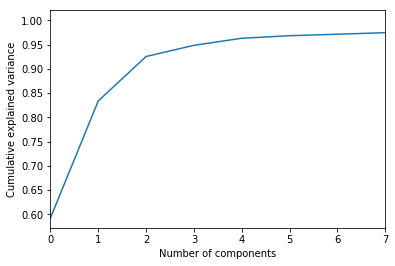

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(norm_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([[ 6.39070760e-04, -2.35722934e-05, -2.36801459e-04, ...,
        -2.61329351e-08, -5.62597732e-09, -3.89298443e-04],
       [ 1.20314234e-04,  6.60163227e-04, -1.58026311e-04, ...,
         6.06233975e-09, -5.96647587e-09,  2.32070657e-04],
       [-1.22460363e-04, -1.71369126e-03, -3.28185512e-04, ...,
        -1.09328336e-09, -8.83024927e-09, -7.13534990e-04],
       ...,
       [ 0.00000000e+00,  7.90697961e-35, -2.17501281e-34, ...,
         1.27354831e-31, -3.83713098e-31,  1.41529520e-35],
       [-0.00000000e+00,  1.99617911e-34, -9.36695206e-35, ...,
         3.89168305e-31, -2.09644239e-31, -3.76158192e-36],
       [-0.00000000e+00,  3.34454686e-14, -7.82109394e-14, ...,
        -7.87373341e-12,  4.52729602e-12,  9.33281230e-16]])